In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df= pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.tail(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
387,Prof,A,29,15,Male,109305
388,Prof,A,38,36,Male,119450
389,Prof,A,33,18,Male,186023
390,Prof,A,40,19,Male,166605
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
198,Prof,B,34,33,Male,189409


In [7]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
276,Prof,A,52,48,Male,107200
275,Prof,A,12,6,Male,93000
135,Prof,A,20,18,Male,136000
244,Prof,A,19,23,Male,84273
337,Prof,B,13,12,Male,145000


In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
#finding unique entries in rank
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [10]:
#finding discipline entries in rank
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [11]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [12]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

**EDA**

Scatterplot

<AxesSubplot:xlabel='rank', ylabel='salary'>

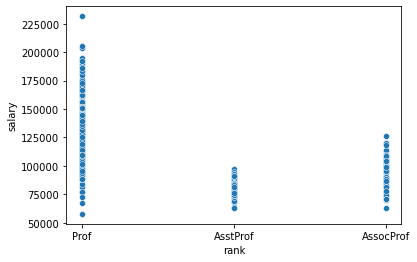

In [13]:
sns.scatterplot(x='rank', y='salary' ,data=df)

Observations:
we can see prof has highest salary ranging form 60k -220k
then AssocProf has between (70k-130k)
ASStProf has lowest salary (70k-100k)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

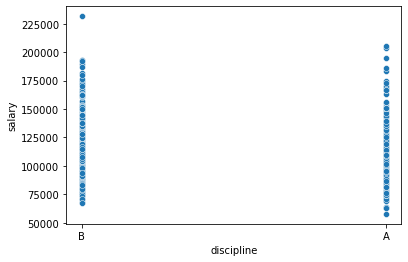

In [14]:
sns.scatterplot(x='discipline', y='salary' ,data=df)

Observation:From the above graph we can say discipline 'A' and  'B' has almost same salary

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

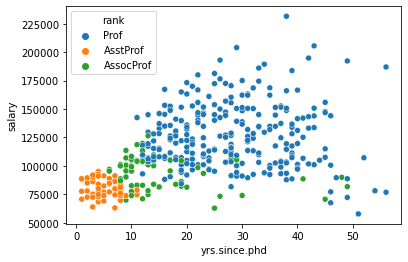

In [15]:
sns.scatterplot(x='yrs.since.phd', y='salary' ,hue="rank"  ,data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

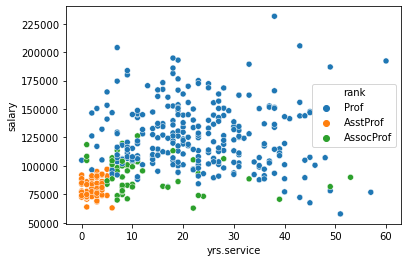

In [16]:
sns.scatterplot(x='yrs.service', y='salary',hue="rank" ,data=df)

Observation

<AxesSubplot:xlabel='sex', ylabel='salary'>

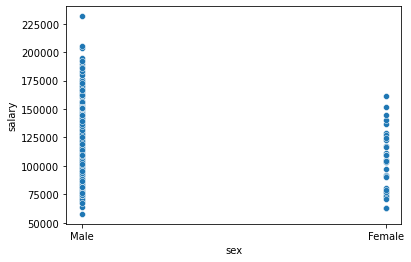

In [17]:
sns.scatterplot(x='sex', y='salary',hue_order="rank"  ,data=df)

Observation: Male has higher salary as compaired to females for the same rank

In [18]:

df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [19]:
from sklearn.preprocessing import  LabelEncoder
LE =LabelEncoder()
df['rank']=LE.fit_transform(df['rank'])
df['rank'].value_counts()
# df['discipline'],  df['sex'])

2    266
1     67
0     64
Name: rank, dtype: int64

In [20]:
df['discipline']=LE.fit_transform(df['discipline'])
df['discipline'].value_counts()

1    216
0    181
Name: discipline, dtype: int64

In [21]:
df['sex']=LE.fit_transform(df['sex'])
df['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

In [22]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [23]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [24]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

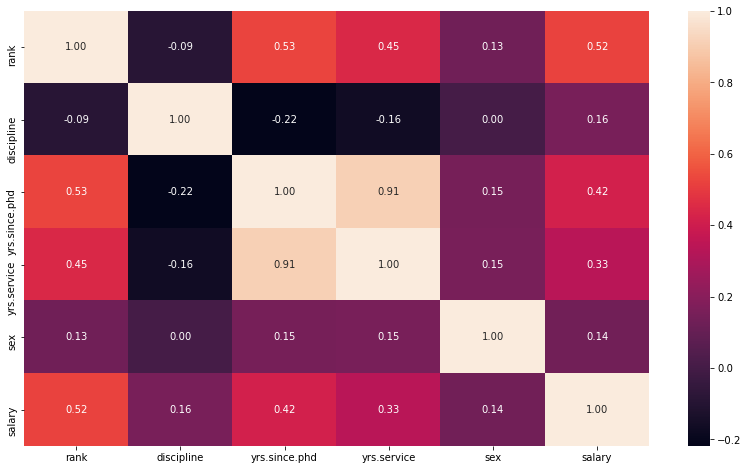

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True , fmt=".2f")

1)sex has 14% of correlation  
2)discipline has 15% of correlation       
3)yrs.service has 33% of correlation    
4)yrs.since.phd has 42% of correlation   
5)rank has 52% of correlation             
 rank has highest correlation with Salary and sex has lowest correlation with salry 
 

In [26]:
#Describe Dataset
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


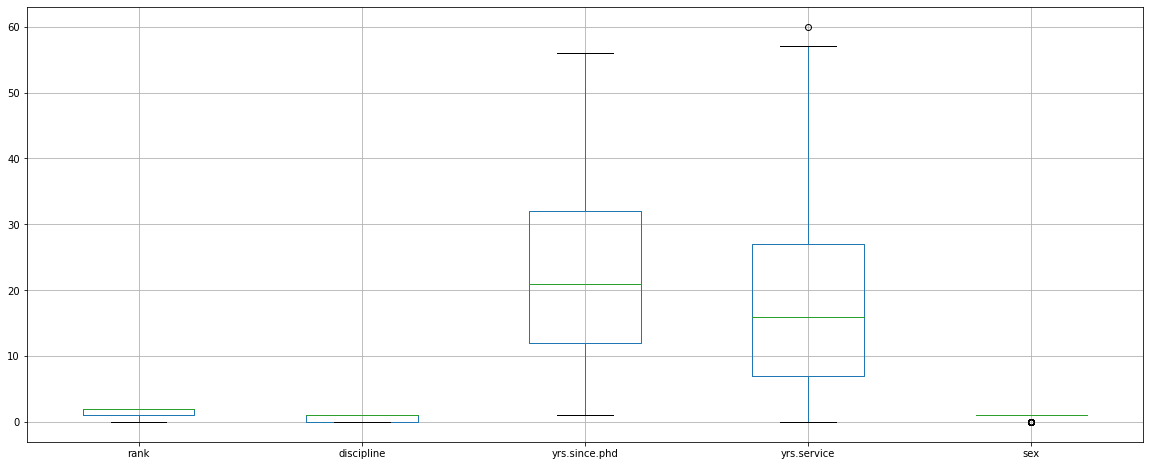

In [27]:
#outliers checking

df.iloc[:,:-1].boxplot(figsize=(20,8))

plt.show()


we can see yrs.service and sex has outlier but they are quite close to whiskers line so will keep them.

**checking Skewness**

In [28]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

by considering threshold Range of skewness (+/-0.5)
rank ,sex and yrs.service are having skewness more than threshold

**Data cleaning**

In [29]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

**Removing Outliers**

Z-Score technique

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 6)

In [31]:
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [32]:
#if np.abs then threshold=3 or else threshold=+/-3
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [33]:
#total no. of outliers
len(np.where(z>3)[0])

43

In [34]:
df_new=df.drop([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364])

old datframe shape :397 rows × 6 columns
new datframe shape :354 rows × 6 columns
43 outlier records has been droped

In [35]:
#%loss of data
loss=(43/397)*100
loss

10.831234256926953

In [36]:
#dataframe after droping outliers
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


Dividing data for features and vectors

In [37]:
#independent data
x=df_new.iloc[:,:-1]
#target data
y=df_new.iloc[:,-1]

**Transforming data to remove skewness**

In [38]:
from sklearn.preprocessing import power_transform


x= power_transform(x,method='yeo-johnson')

x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [39]:
#For normalization of data
from sklearn.preprocessing import StandardScaler


In [40]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [41]:
print(x.shape)
print(y.shape)

(354, 5)
(354,)


In [42]:
Lr= LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30 ,random_state=42)

In [43]:
Lr.fit(x_train,y_train)


LinearRegression()

In [57]:
#putting together coefficient and their value names
Lr_coef=Lr.coef_
coef_df=pd.DataFrame()
coef_df["Column_name"]=['rank','discipline','yrs.since.phd','yrs.service','sex']
coef_df["Coefficient_value"]=Lr_coef
coef_df


,Column_name,Coefficient_value
0,rank,15292.412009
1,discipline,7477.191451
2,yrs.since.phd,12362.428670
3,yrs.service,-9951.004146
4,sex,0.000000


In [45]:
Lr.intercept_

113242.644051308

In [46]:
Lr.score(x_train,y_train)

0.39326096100377406

In [55]:
# Predict value
pred =Lr.predict(x_test)
Df=pd.DataFrame()
Df['Actual_result_price']=y_test
Df['predict_result_price']=pred
print(Df)
r_square=r2_score(pred,y_test)
print("R squerred error on test set:",r_square)

     Actual_result_price  predict_result_price
251               102000         120581.704449
50                126621         127856.748080
321                95642          85407.926640
206               162200         130878.435731
66                101000         133588.238573
..                   ...                   ...
266               143940         117108.627657
220               170000         125843.175105
284                88650          72471.389710
392               103106         115865.087806
328                99247          85662.448528

[107 rows x 2 columns]
R squerred error on test set: -0.5423239783587683


In [48]:
print("Error :")
print("Mean absolute error :" ,mean_absolute_error(y_test,pred))
print("Mean squared error :" ,mean_squared_error(y_test,pred))

print("root Mean Squred Error :" ,np.sqrt(mean_squared_error(y_test,pred)))

Error :
Mean absolute error : 18321.958170123038
Mean squared error : 538184939.0909469
root Mean Squred Error : 23198.81331212756


113242.644051308

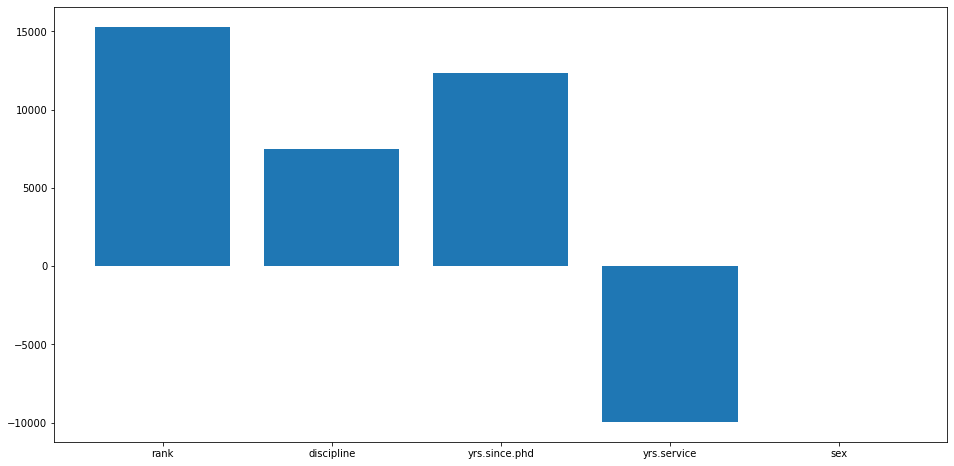

In [60]:
plt.rcParams['figure.figsize']=(16,8)
plt.bar(coef_df["Column_name"],coef_df["Coefficient_value"])

Lr.intercept_

**Regularization L1 and L2**

In [49]:
from sklearn.linear_model import Lasso ,Ridge

In [64]:
ls=Lasso(alpha=0.1) 
#ls=Lasso(alpha=1.0) #    default
ls.fit(x_train , y_train)
ls.score(x_train , y_train)

0.39326096072735683

In [58]:
#putting together coefficient and their value names
Lr_coef=Lr.coef_
coef_df=pd.DataFrame()
coef_df["Column_name"]=['rank','discipline','yrs.since.phd','yrs.service','sex']
coef_df["Coefficient_value"]=Lr_coef
coef_df


,Column_name,Coefficient_value
0,rank,15292.412009
1,discipline,7477.191451
2,yrs.since.phd,12362.428670
3,yrs.service,-9951.004146
4,sex,0.000000


In [65]:
# Predict value
pred =Lr.predict(x_test)
Df=pd.DataFrame()
Df['Actual_result_price']=y_test
Df['predict_result_price']=pred
print(Df)
r_square=r2_score(pred,y_test)
print("R squerred error on test set:",r_square)

     Actual_result_price  predict_result_price
251               102000         120581.704449
50                126621         127856.748080
321                95642          85407.926640
206               162200         130878.435731
66                101000         133588.238573
..                   ...                   ...
266               143940         117108.627657
220               170000         125843.175105
284                88650          72471.389710
392               103106         115865.087806
328                99247          85662.448528

[107 rows x 2 columns]
R squerred error on test set: -0.5423239783587683


In [61]:
print("Error :")
print("Mean absolute error :" ,mean_absolute_error(y_test,pred))
print("Mean squared error :" ,mean_squared_error(y_test,pred))

print("root Mean Squred Error :" ,np.sqrt(mean_squared_error(y_test,pred)))

Error :
Mean absolute error : 18321.958170123038
Mean squared error : 538184939.0909469
root Mean Squred Error : 23198.81331212756


113242.644051308

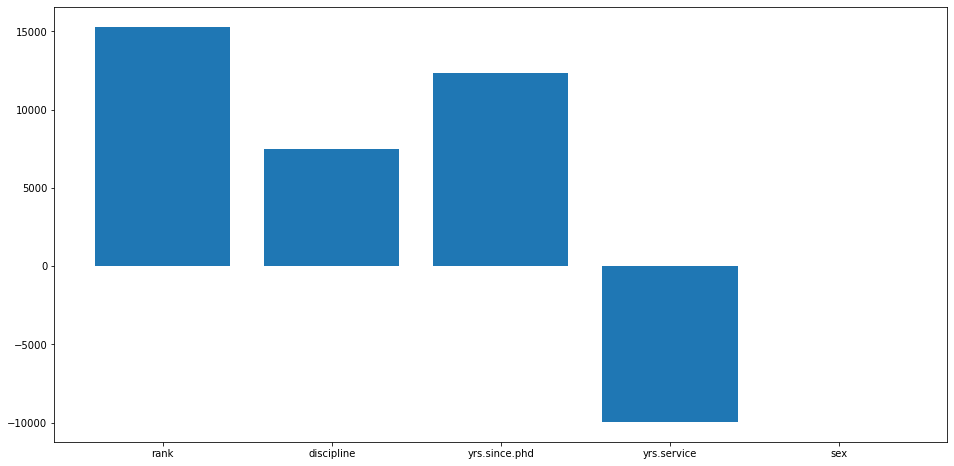

In [62]:
plt.rcParams['figure.figsize']=(16,8)
plt.bar(coef_df["Column_name"],coef_df["Coefficient_value"])

Lr.intercept_

**ridge Regresssion**

In [66]:
Rdg=Ridge(alpha=1)
Rdg.fit(x_train , y_train)
pred=Rdg.predict(x_test)

In [68]:
#putting together coefficient and their value names
Lr_coef=Lr.coef_
coef_df=pd.DataFrame()
coef_df["Column_name"]=['rank','discipline','yrs.since.phd','yrs.service','sex']
coef_df["Coefficient_value"]=Lr_coef
coef_df

,Column_name,Coefficient_value
0,rank,15292.412009
1,discipline,7477.191451
2,yrs.since.phd,12362.428670
3,yrs.service,-9951.004146
4,sex,0.000000


In [69]:
# Predict value
pred =Lr.predict(x_test)
Df=pd.DataFrame()
Df['Actual_result_price']=y_test
Df['predict_result_price']=pred
print(Df.head(15))
r_square=r2_score(pred,y_test)
print("")
print("R squerred error on test set:",r_square*100)


     Actual_result_price  predict_result_price
251               102000         120581.704449
50                126621         127856.748080
321                95642          85407.926640
206               162200         130878.435731
66                101000         133588.238573
306                74500          82712.778957
16                101000         124584.833458
67                 99418         131929.501024
163                89942          93087.643217
378               150680         115698.148293
95                 84000         101896.794678
193                86250          88149.114237
393               150564         120963.145550
345               107986         128488.983372
140               100102          77322.458055

R squerred error on test set: -54.23239783587683


113242.644051308

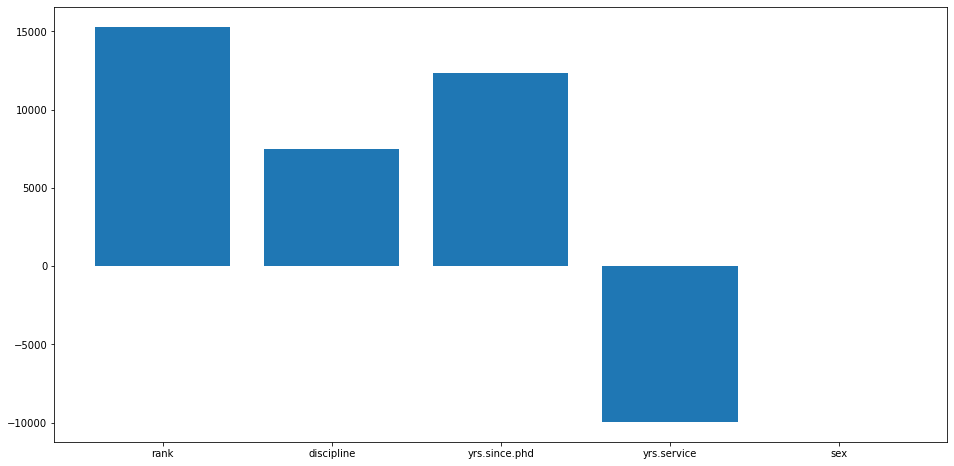

In [70]:
plt.rcParams['figure.figsize']=(16,8)
plt.bar(coef_df["Column_name"],coef_df["Coefficient_value"])

Lr.intercept_